In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Kashif ahmad\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
transactions = pd.read_csv('transactions.csv')

In [3]:
products_data = {
    'ProductID': ['P001', 'P002', 'P003', 'P004', 'P005'],
    'ProductName': ['ActiveWear Biography', 'ActiveWear Smartwatch', 'ComfortLiving Biography',
                    'BookWorld Rug', 'TechPro T-Shirt'],
    'Category': ['Books', 'Electronics', 'Books', 'Home Decor', 'Clothing'],
    'Price': [169.3, 346.3, 44.12, 95.69, 429.31]
}

In [4]:
products = pd.DataFrame(products_data)

In [5]:
customers_data = {
    'CustomerID': ['C0001', 'C0002', 'C0003', 'C0004', 'C0005'],
    'CustomerName': ['Lawrence Carroll', 'Elizabeth Lutz', 'Michael Rivera', 'Kathleen Rodriguez', 'Laura Weber'],
    'Region': ['South America', 'Asia', 'South America', 'South America', 'Asia'],
    'SignupDate': ['2022-07-10', '2022-02-13', '2024-03-07', '2022-10-09', '2022-08-15']
}

In [6]:
customers = pd.DataFrame(customers_data)

In [7]:
# Merge datasets
merged_data = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')


# Feature engineering: Create customer-level aggregated data

In [8]:
customer_features = merged_data.groupby('CustomerID').agg(
    total_transactions=('TransactionID', 'count'),
    total_quantity=('Quantity', 'sum'),
    total_revenue=('TotalValue', 'sum'),
    avg_transaction_value=('TotalValue', 'mean')
).reset_index()

In [9]:
# One-hot encode regions
region_dummies = pd.get_dummies(customers.set_index('CustomerID')['Region'])
customer_features = customer_features.set_index('CustomerID').join(region_dummies)

In [10]:
# Normalize the feature data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(customer_features)

In [25]:
# Perform clustering using KMeans
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(normalized_features)
customer_features['Cluster'] = clusters

C:\Users\Kashif ahmad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kashif ahmad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

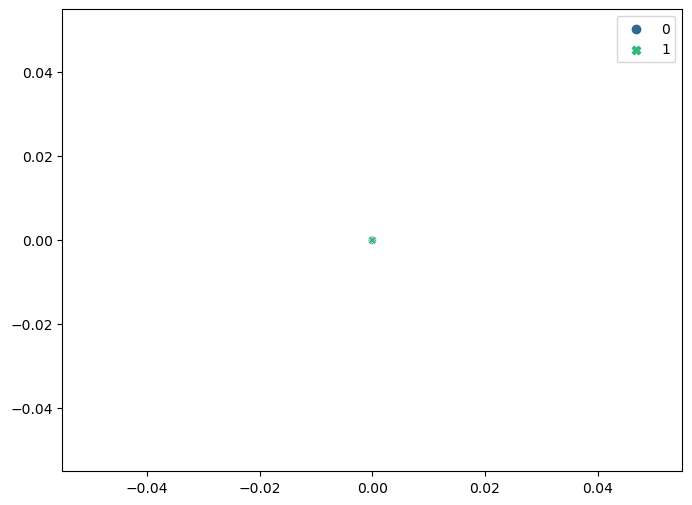

In [29]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=normalized_features[:, 0],
    y=normalized_features[:, 1],
    hue=clusters,
    palette='viridis',
    style=clusters,
    legend='full'
)

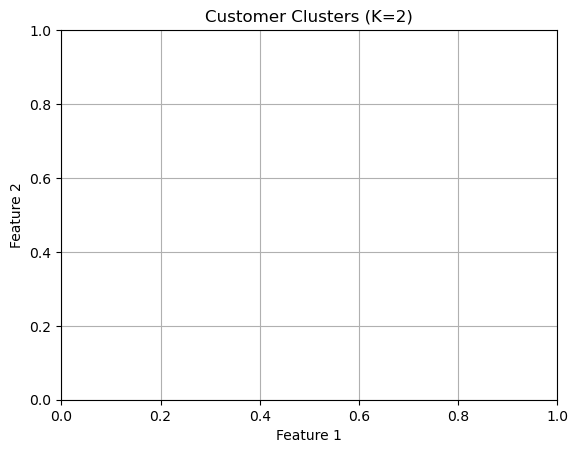

In [30]:
plt.title(f'Customer Clusters (K={num_clusters})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [31]:
# Save clustering results
customer_features.reset_index()[['CustomerID', 'Cluster']].to_csv('Customer_Clusters.csv', index=False)

In [32]:
# Summary of Clustering
print("\nSummary of Clustering:")
print(customer_features.groupby('Cluster').agg(
    num_customers=('total_transactions', 'count'),
    avg_revenue=('total_revenue', 'mean'),
    avg_quantity=('total_quantity', 'mean')
))


Summary of Clustering:
         num_customers  avg_revenue  avg_quantity
Cluster                                          
0                    1       382.76           4.0
1                    1      1385.20           4.0
